In [20]:
import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns
import os
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.metrics import confusion_matrix,plot_confusion_matrix,accuracy_score,precision_score, recall_score, f1_score,roc_auc_score,classification_report,mean_squared_error
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import pickle
filename ='finalized_model_RanFor4.sav'
loaded_model = pickle.load(open(filename,'rb'))


In [3]:
Depression=pd.read_csv('DASSDS.csv',delimiter='\t')
Depression.drop(columns=['Unnamed: 0'])
Depression

,Unnamed: 0,Q3A,Q5A,Q10A,Q13A,Q16A,Q17A,Q21A,Q24A,Q26A,...,hand,religion,orientation,race,voted,married,familysize,major,Age_Groups,Condition
0,2,3,3,3,3,3,3,3,3,0,...,1,4,3,60,1,1,3,No Degree,1.0,Extremely Severe
1,4,2,3,2,3,2,3,2,1,3,...,3,10,1,10,2,1,4,Psychology,1.0,Extremely Severe
2,5,1,2,1,0,3,1,0,1,0,...,1,4,1,70,2,1,4,No Degree,1.0,Mild
3,6,1,3,3,1,3,1,3,2,1,...,1,7,2,60,2,1,4,Engineering,1.0,Extremely Severe
4,7,0,2,0,0,0,0,0,0,1,...,1,2,2,60,1,1,2,Music/Dance,2.0,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34046,39768,0,1,0,1,1,0,0,1,1,...,1,4,1,60,1,1,3,Psychology,2.0,Normal
34047,39771,2,2,3,3,3,2,3,3,3,...,1,10,3,10,2,1,4,Mathematics,1.0,Extremely Severe
34048,39772,1,0,0,1,0,0,0,1,0,...,1,7,1,30,1,2,3,I.T,3.0,Normal
34049,39773,1,2,0,3,0,1,1,1,2,...,1,6,1,60,1,1,2,Mathematics,1.0,Moderate


In [7]:
scaler=MinMaxScaler()
X=Depression[['Q3A', 'Q5A', 'Q10A', 'Q13A', 'Q16A', 'Q17A', 'Q21A', 'Q24A', 'Q26A',
       'Q31A', 'Q34A', 'Q37A', 'Q38A', 'Q42A',
       'Extraverted-enthusiastic', 'Critical-quarrelsome',
       'Dependable-self_disciplined', 'Anxious-easily upset',
        'Open to new experiences-complex', 'Reserved-quiet', 'Sympathetic-warm',
        'Disorganized-careless', 'Calm-emotionally_stable',
        'Conventional-uncreative', 'education', 'urban', 'gender',
         'uniquenetworklocation',  'religion',
        'orientation', 'race',  'married', 'familysize',
        'Age_Groups']]
y=Depression[['Condition']]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.35,random_state=0)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [5]:
print('Training Set:',X_train.shape,y_train.shape)
print('Test Set:',X_test.shape,y_test.shape)

Training Set: (22133, 34) (22133, 1)
Test Set: (11918, 34) (11918, 1)


In [21]:
prediction = loaded_model.predict([[3, 3, 3, 3, 3, 3, 3, 3, 0,3, 3, 3, 3, 3, 2, 5, 2, 2,5, 6, 5,5, 3,2, 2, 3, 2,  1,  4,3,60, 1, 3,1]])
prediction

C:\Users\hady2\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array(['Extremely Severe'], dtype=object)

In [29]:
Alpha = [[ 1, 3, 1, 2, 1, 1, 2, 2, 2, 1, 1, 2, 1, 3, 2, 2, 5, 4, 6, 7, 4, 6, 3, 6, 2, 3, 2,  1, 4, 2, 50, 1, 2,1]]
prediction1 = loaded_model.predict(Alpha)
prediction1

C:\Users\hady2\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array(['Severe'], dtype=object)

Accuracy: 0.9887565027689209
F1_Score: 0.9887244033848689
Recall_Score: 0.9887565027689209
Precision_Score: 0.9887913654011685


C:\Users\hady2\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\hady2\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\hady2\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\hady2\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

Cross Validation Score: 0.926941492432114 3
                  precision    recall  f1-score   support

Extremely Severe     0.9981    0.9975    0.9978      3644
            Mild     0.9842    0.9502    0.9669      1245
        Moderate     0.9729    0.9901    0.9814      2215
          Normal     0.9906    0.9972    0.9939      2865
          Severe     0.9897    0.9831    0.9864      1949

        accuracy                         0.9888     11918
       macro avg     0.9871    0.9836    0.9853     11918
    weighted avg     0.9888    0.9888    0.9887     11918



C:\Users\hady2\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


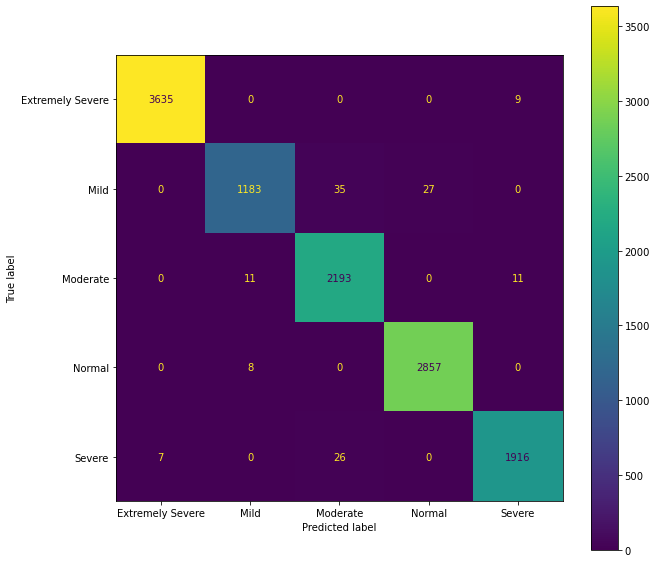

In [30]:
Acc_ran= accuracy_score(y_test,loaded_model.predict(X_test))
f1_ran= f1_score(y_test,loaded_model.predict(X_test),average='weighted')
recall_ran= recall_score(y_test,loaded_model.predict(X_test),average='weighted')
precision_ran= precision_score(y_test,loaded_model.predict(X_test),average='weighted')
print('Accuracy:',Acc_ran)
print('F1_Score:',f1_ran)
print('Recall_Score:',recall_ran)
print('Precision_Score:',precision_ran)
print('Cross Validation Score:', np.mean(cross_val_score(loaded_model, X_train, y_train, cv = 6)),3)
classification=classification_report(
    digits=4,
    y_true=y_test,
    y_pred=loaded_model.predict(X_test))
print(classification)
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(loaded_model,X_test,y_test,ax=ax)

In [ ]:
X=Depression[['Q3A', 'Q5A', 'Q10A', 'Q13A', 'Q16A', 'Q17A', 'Q21A', 'Q24A', 'Q26A',
       'Q31A', 'Q34A', 'Q37A', 'Q38A', 'Q42A',
       'Extraverted-enthusiastic', 'Critical-quarrelsome',
       'Dependable-self_disciplined', 'Anxious-easily upset',
        'Open to new experiences-complex', 'Reserved-quiet', 'Sympathetic-warm',
        'Disorganized-careless', 'Calm-emotionally_stable',
        'Conventional-uncreative', 'education', 'urban', 'gender', 'engnat',
        'screensize', 'uniquenetworklocation', 'hand', 'religion',
        'orientation', 'race', 'voted', 'married', 'familysize',
        'Age_Groups']]